# **Ex1 - Unsupervised learning**

## Names and IDs

1.   Nicole Neginsky - 209296169
2.   Lilach Zaks - 318504222

**Introduction**

In this assignment, we will focus on the practical application of unsupervised learning methods, specifically K-means clustering and Principal Component Analysis (PCA). The primary objective is to deepen your understanding of these algorithms and develop proficiency in their implementation using Python and relevant libraries.

**Learning Objectives:**
1.   **Load Local Files**: Implement techniques for
     loading datasets from a local file system into Python.
3.   **Data Visualization**: Apply various visualization techniques to interpret and present your data analysis findings effectively.
4.   **Use Scikit-learn for K-means Clustering**: Use the Scikit-learn library to apply the K-means clustering algorithm.
5.   **Implement Scikit-learn PCA**: Utilize PCA from Scikit-learn to perform dimensionality reduction, a critical technique for analyzing high-dimensional data.
6.   **Algoritmic Understendig**: Solve the calculation problem whle using the algorithms learned in class.








**Important Guidelines:**

**Thoroughly Read the Task Before Implementation:** Ensure to understand the entire assignment and its requirements before beginning to code. A comprehensive understanding will aid in a more structured and efficient approach to the tasks.

**Code Reusability and Function Writing:** Focus on writing reusable code and functions. This practice is crucial for maintaining an organized, efficient, and easily debuggable codebase.





















This assignment is designed to enhance both your theoretical understanding and practical skills in key areas of machine learning. Approach each task with diligence and attention to detail.

## Import All Packages
Add all imports needed for this notebook to run

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.decomposition import PCA

## 1. Visualization (15 points)
In this section, your task is to create and analyze **three** insightful visualizations based on the customer segmentation dataset. The purpose of these visualizations is to uncover underlying patterns and trends in the data that can inform strategic decisions. Your ability to interpret these visualizations will be key in understanding customer behaviors and preferences.

*   You will get 4 points for the graph and 1 for the insight.



In [ ]:
# load the data
from google.colab import files
uploaded = files.upload()
data = pd.read_csv("customer_segmentation.csv")

Saving customer_segmentation.csv to customer_segmentation.csv


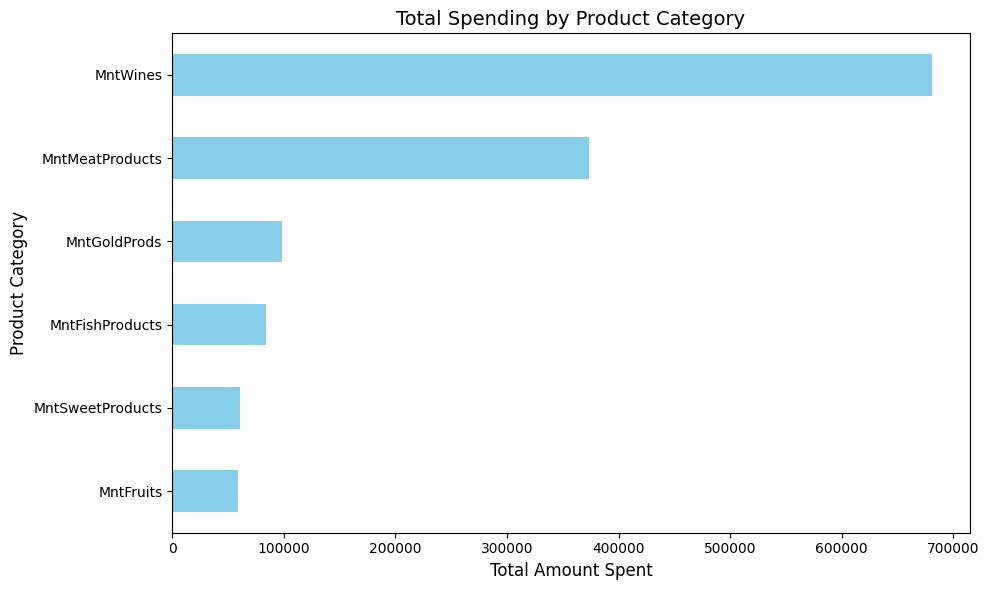

In [ ]:
# Graph 1 -

# Define the product spending columns
spending_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

# Calculate the total spending for each category
spending_sums = data[spending_columns].sum()

# Create a horizontal bar chart
plt.figure(figsize=(10, 6))
spending_sums.sort_values().plot(kind='barh', color="skyblue")
plt.title("Total Spending by Product Category", fontsize=14)
plt.xlabel("Total Amount Spent", fontsize=12)
plt.ylabel("Product Category", fontsize=12)
plt.tight_layout()
plt.show()


**Insight** - The bars in the graph represent the cumulative spending for each category, sorted to highlight which categories generate the most revenue.
The graph reveals that customers spend the most on wines, followed by meat products, while sweet products and fruits have the lowest spending.

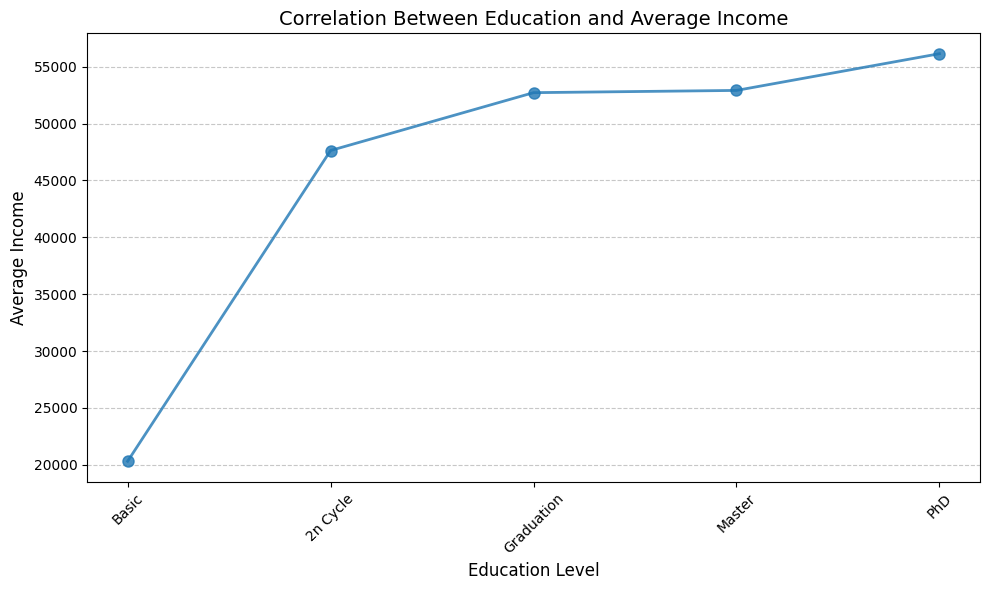

In [ ]:
# Graph 2 -
# Group data by education level and calculate the average income for each group
education_income = data.groupby('Education')['Income'].mean().sort_values()

# Create a line plot connecting the dots
plt.figure(figsize=(10, 6))
plt.plot(education_income.index, education_income.values, marker='o', linestyle='-', linewidth=2, markersize=8, alpha=0.8)
plt.title("Correlation Between Education and Average Income", fontsize=14)
plt.xlabel("Education Level", fontsize=12)
plt.ylabel("Average Income", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

**Insight** - The x-axis in the graph represents education levels, and the y-axis represents income.
The graph shows a positive trend between education levels and average income, where higher education levels, such as a PhD, are associated with higher earnings.

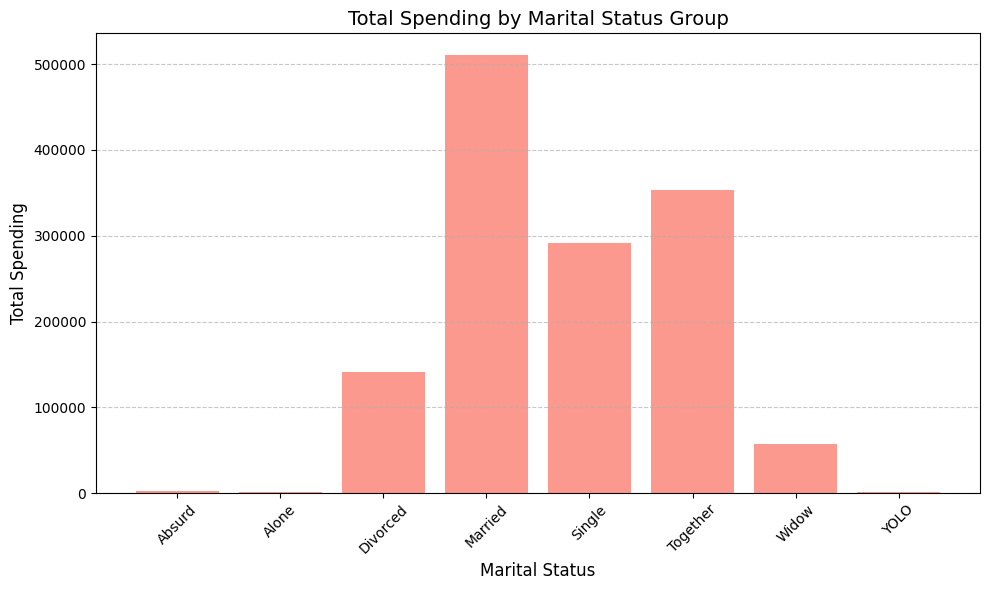

In [ ]:
# Graph 3 -
# Identify product columns
product_columns = [
    'MntWines', 'MntFruits', 'MntMeatProducts',
    'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'
]

# Calculate total spending across all product categories for each marital status group
total_spending = data.groupby('Marital_Status')[product_columns].sum().sum(axis=1)

# Create a bar chart to show total spending by marital status
plt.figure(figsize=(10, 6))
plt.bar(total_spending.index, total_spending.values, alpha=0.8, color='salmon')
plt.title("Total Spending by Marital Status Group", fontsize=14)
plt.xlabel("Marital Status", fontsize=12)
plt.ylabel("Total Spending", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

**Insight** - The graph highlights the total spending across all product categories for each marital status group.
The graph shows that "Married" and "Together" groups spend the most, likely because they have more family members living together, leading to higher collective expenses.

## 2. KMEANS (30 points)

In this exercise, you will implement K-means clustering on a comprehensive customer dataset, to identify distinct customer segments.

*   Load the data again.
*   Scale the data using minmax scaler (2 points).
*   Encode categorical variables (3 points).
*   Apply k-Means algorithm on the 'MntMeatProducts' and 'MntWines' features using n_clusters=5
 (10 points).
*   Visualize the clusters (5 points).
*   Apply k-Means algorithm on all features and find the best k using 2 methods (10 points).
*   Visualize the methods (5 points).
* Note: There are some missing values. Describe how do you handle such.










In [ ]:
# load the data
from google.colab import files
uploaded = files.upload()
data = pd.read_csv("customer_segmentation.csv")

Saving customer_segmentation.csv to customer_segmentation (4).csv


In [ ]:
# Handle missing values: Impute Income colum with the median

# Drop the 'ID' column
data = data.drop(columns=['ID'])
# Group by 'Education' and 'Marital_Status' to calculate median income
income_medians = data.groupby(['Education', 'Marital_Status'])['Income'].median()

# Define a function to apply segmented median imputation
def impute_income(row):
    if np.isnan(row['Income']):
        return income_medians.loc[row['Education'], row['Marital_Status']]
    return row['Income']

# Apply the function to the dataset
data['Income'] = data.apply(impute_income, axis=1)

# Scale the data using MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data.select_dtypes(include=np.number))

# Encode categorical variables
cat_features = data.select_dtypes(include='object').columns
encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_cats = encoder.fit_transform(data[cat_features])
encoded_cats_df = pd.DataFrame(encoded_cats, columns=encoder.get_feature_names_out(cat_features))

# Combine scaled numerical and encoded categorical data
scaled_encoded_data = pd.concat([pd.DataFrame(scaled_data, columns=data.select_dtypes(include=np.number).columns),
                                  encoded_cats_df], axis=1)

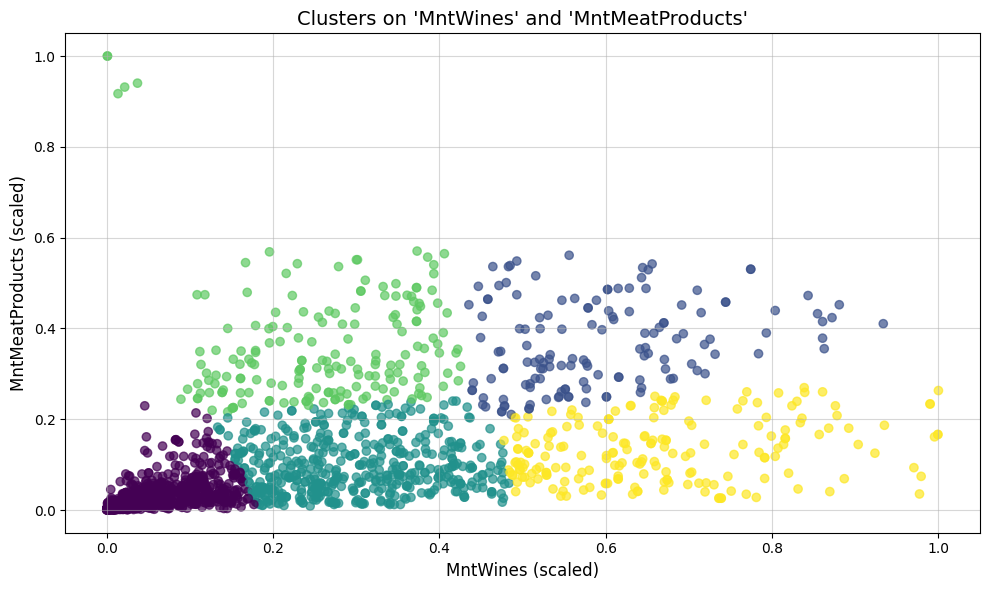

In [ ]:
# Apply k-Means on the 'MntWines' and 'MntMeatProducts' features with n_clusters=5

selected_features_scaled = scaled_encoded_data[['MntWines', 'MntMeatProducts']].values

# Apply k-Means with n_clusters=5
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(selected_features_scaled)

# Add cluster labels to the dataset
data['Cluster'] = clusters

# Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(selected_features_scaled[:, 0], selected_features_scaled[:, 1], c=clusters, cmap='viridis', alpha=0.7)
plt.title("Clusters on 'MntWines' and 'MntMeatProducts'", fontsize=14)
plt.xlabel('MntWines (scaled)', fontsize=12)
plt.ylabel('MntMeatProducts (scaled)', fontsize=12)
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()


### Elbow

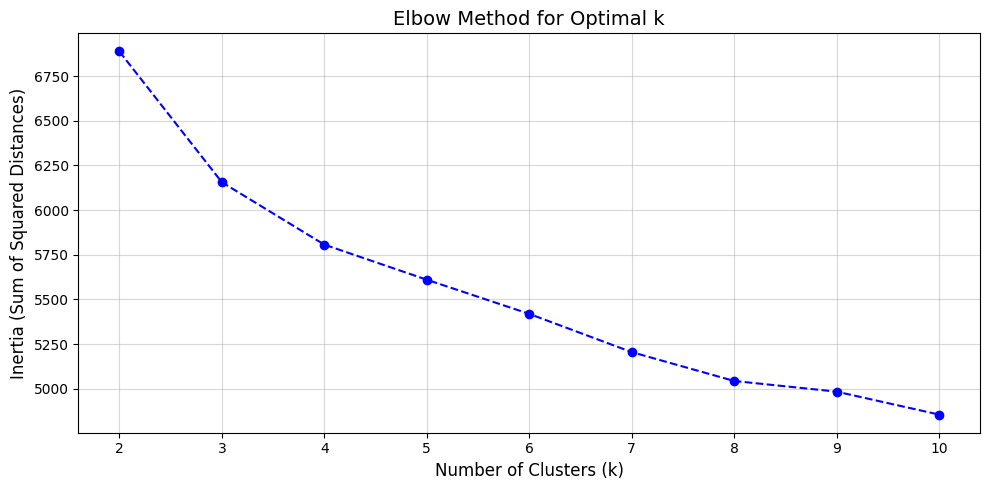

In [ ]:
def kmeans_evaluation(data, k_range, metric='inertia'):
    # General function to evaluate k-means clustering for a range of k values.
    results = []
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        clusters = kmeans.fit_predict(data)
        results.append(kmeans.inertia_)  # Inertia for Elbow Method
    return results

def plot_results(k_range, results, title, ylabel, color='blue'):
    # Plot the results of k-means evaluation.
    plt.figure(figsize=(10, 5))
    plt.plot(k_range, results, marker='o', linestyle='--', color=color)
    plt.title(title, fontsize=14)
    plt.xlabel("Number of Clusters (k)", fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.grid(alpha=0.5)
    plt.tight_layout()
    plt.show()

# Define range for k
k_values = range(2, 11)

# Use scaled and encoded data
X = scaled_encoded_data

# Elbow Method: Inertia
inertia_results = kmeans_evaluation(X, k_values, metric='inertia')
plot_results(k_values, inertia_results, "Elbow Method for Optimal k", "Inertia (Sum of Squared Distances)")



### Silhouette Score

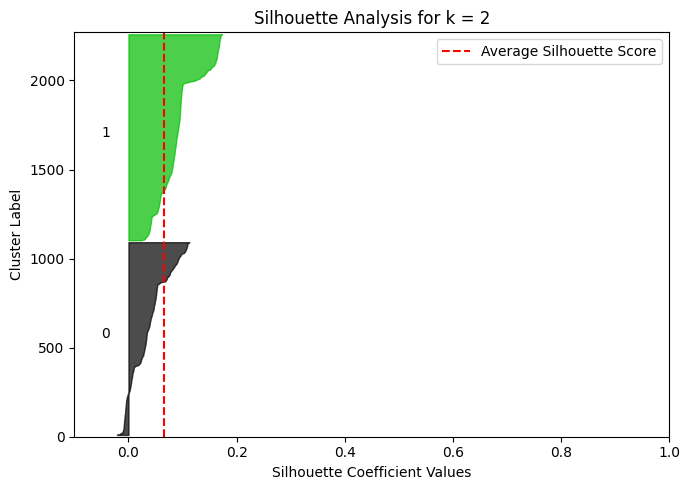

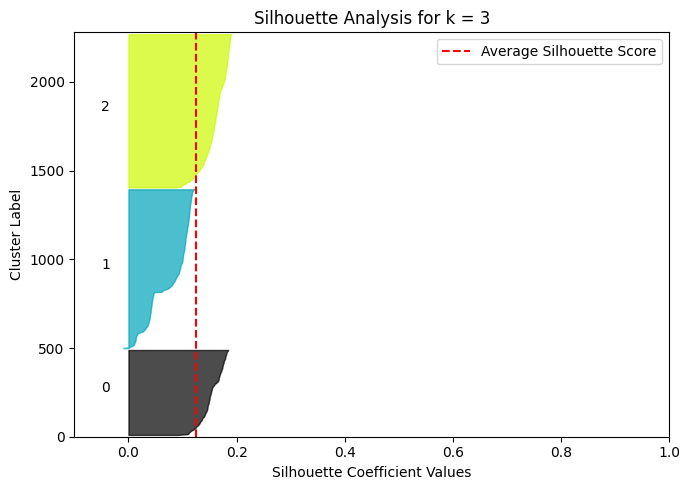

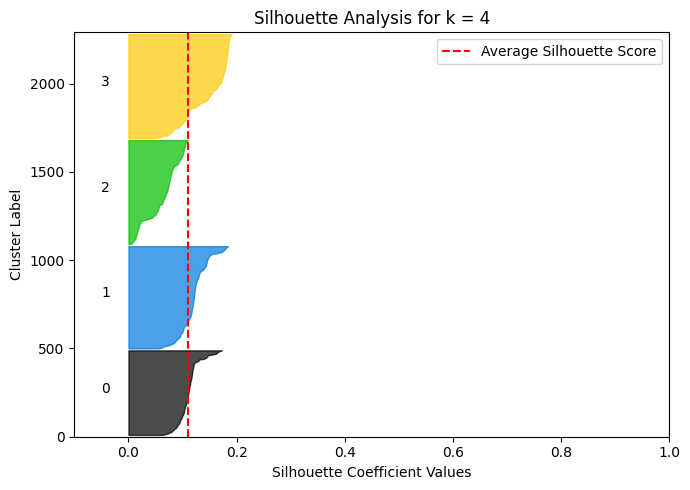

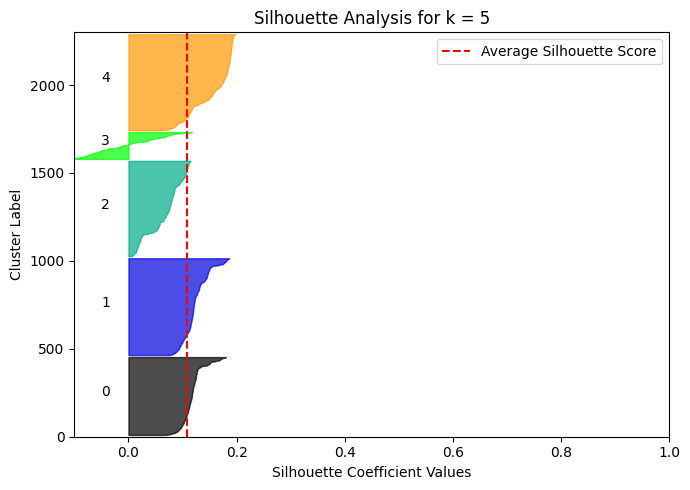

In [ ]:
# Define range for k
k_values = range(2, 6)  # Adjust the range as needed

# Loop through k values to generate silhouette plots
for k in k_values:
    # Perform k-means clustering
    kmeans = KMeans(n_clusters=k, random_state=42).fit(scaled_encoded_data)
    cluster_labels = kmeans.labels_
    silhouette_avg = silhouette_score(scaled_encoded_data, cluster_labels)
    sample_silhouette_values = silhouette_samples(scaled_encoded_data, cluster_labels)

    # Plot the silhouette analysis
    plt.figure(figsize=(7, 5))
    y_lower = 10
    for i in range(k):
        cluster_silhouette = sample_silhouette_values[cluster_labels == i]
        cluster_silhouette.sort()
        size_cluster_i = len(cluster_silhouette)
        y_upper = y_lower + size_cluster_i

        plt.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_silhouette,
                          alpha=0.7, color=plt.cm.nipy_spectral(float(i) / k))
        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10

    plt.axvline(x=silhouette_avg, color="red", linestyle="--", label="Average Silhouette Score")
    plt.title(f"Silhouette Analysis for k = {k}")
    plt.xlabel("Silhouette Coefficient Values")
    plt.ylabel("Cluster Label")
    plt.xlim([-0.1, 1])
    plt.ylim([0, len(scaled_encoded_data) + (k + 1) * 10])
    plt.legend()
    plt.tight_layout()
    plt.show()

The best k is 4 because:

- A clear "elbow" in the inertia plot.
- Well-separated and cohesive clusters in the silhouette analysis.

## 3. PCA (15 points)
In this exercise, you will implement PCA:
*   With n_components = 2 (5 points).
*   Visualize the PCA (5 points).
*   Find the variance explined in this PCA (5 points).





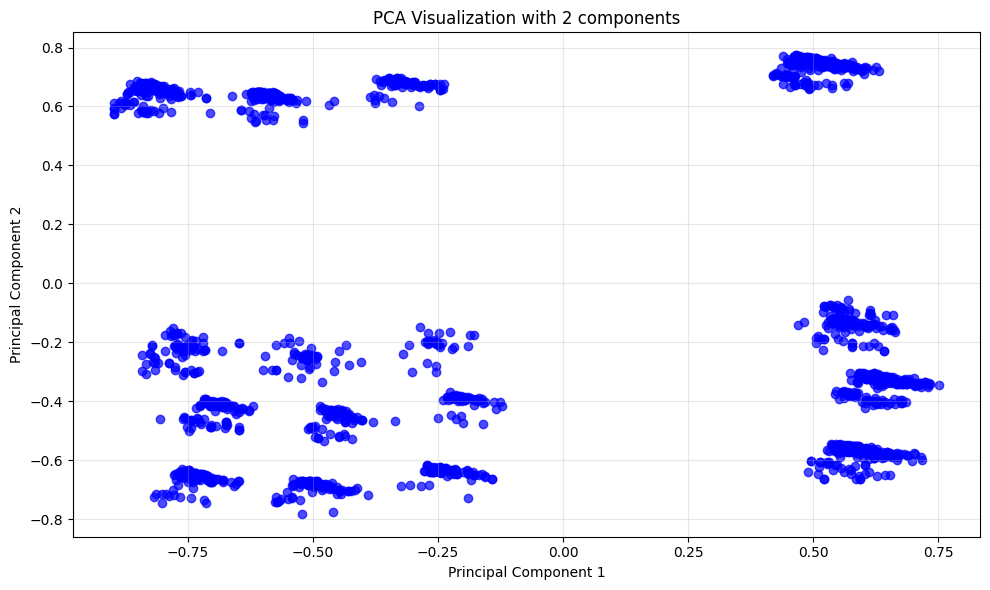

Explained Variance Ratio by Each Component:
Principal Component 1: 0.1051 (10.51%)
Principal Component 2: 0.0998 (9.98%)

Total Explained Variance (n_components=2): 20.49%


In [ ]:
# Adjust n_components as needed
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_encoded_data)


# Create a DataFrame with the principal components
pca_columns = [f"Principal Component {i+1}" for i in range(2)]
pca_df = pd.DataFrame(pca_data, columns=pca_columns)


# Plotting the PCA
plt.figure(figsize=(10, 6))
plt.scatter(pca_df["Principal Component 1"], pca_df["Principal Component 2"], alpha=0.7, c='blue')
plt.title("PCA Visualization with 2 components")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Display explained variance
explained_variance = pca.explained_variance_ratio_
total_variance = explained_variance.sum()

print("Explained Variance Ratio by Each Component:")
for i, var in enumerate(explained_variance, 1):
    print(f"Principal Component {i}: {var:.4f} ({var*100:.2f}%)")

print(f"\nTotal Explained Variance (n_components={2}): {total_variance*100:.2f}%")

**Q**: What is the variance explained in the 2 component PCA?

**A**: The variance explained in the 2-component PCA refers to the proportion of the dataset's total variance captured by the first two principal components.

- Explained Variance Ratio:
  - Principal Component 1: 0.1051 (10.51%)
  - Principal Component 2: 0.0998 (9.98%)
- Total Variance:  20.49%

## 4. PCA & Kmeans (20 points)
This time, we will use the PCA data for the kmeans model.
*   Run PCA with n_components = 2 (5 points)
*   Find the best k for kmeans (5 points)
*   Plot the best clusters (5 points)
*   Answer the question (5 points)





In [ ]:
# Run PCA with n_components
# Adjust n_components as needed
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_encoded_data)

# Create a DataFrame with the principal components
pca_columns = [f"Principal Component {i+1}" for i in range(2)]
pca_df = pd.DataFrame(pca_data, columns=pca_columns)

### Elbow

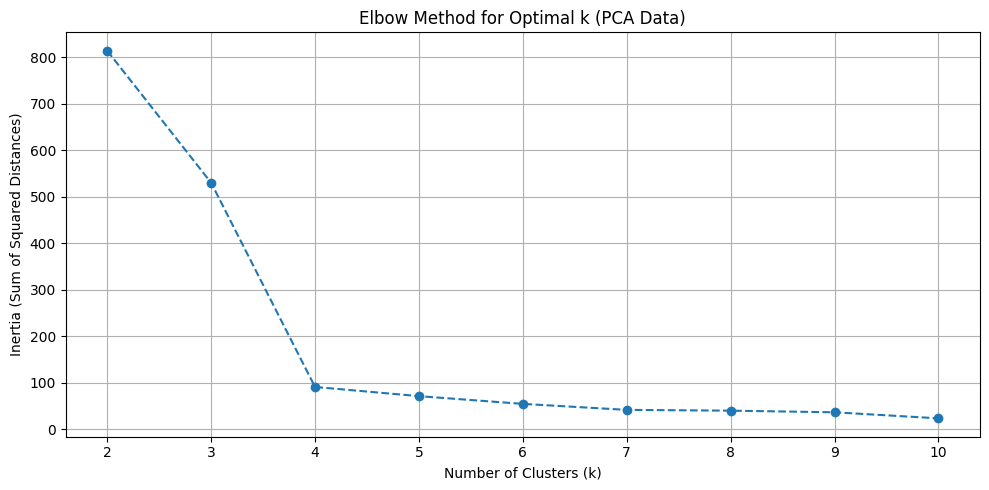

In [ ]:
# Find the best k for k-means using Elbow method
k_values = range(2, 11)
inertia = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(pca_data)
    inertia.append(kmeans.inertia_)

# Plot the method
plt.figure(figsize=(10, 5))
plt.plot(k_values, inertia, marker='o', linestyle='--')
plt.title("Elbow Method for Optimal k (PCA Data)")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (Sum of Squared Distances)")
plt.grid()
plt.tight_layout()
plt.show()

### Silhouette

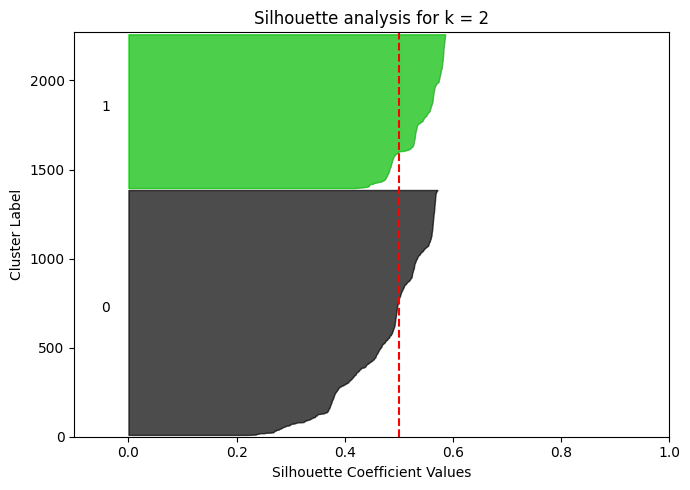

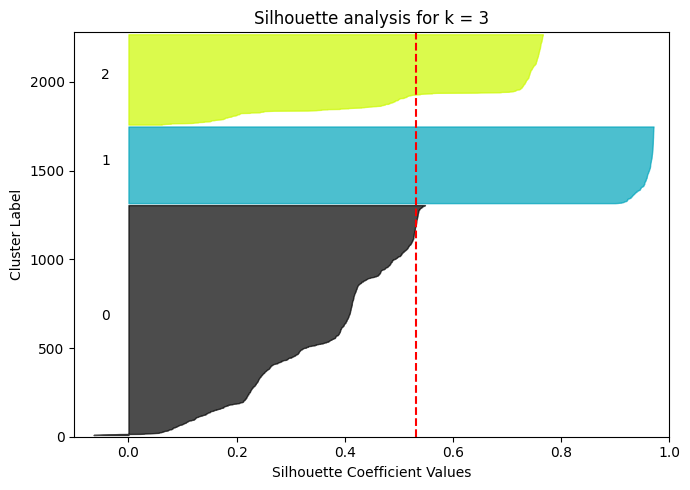

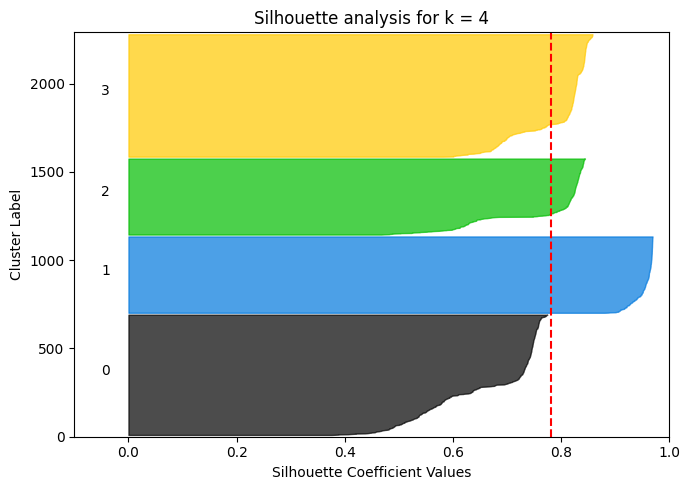

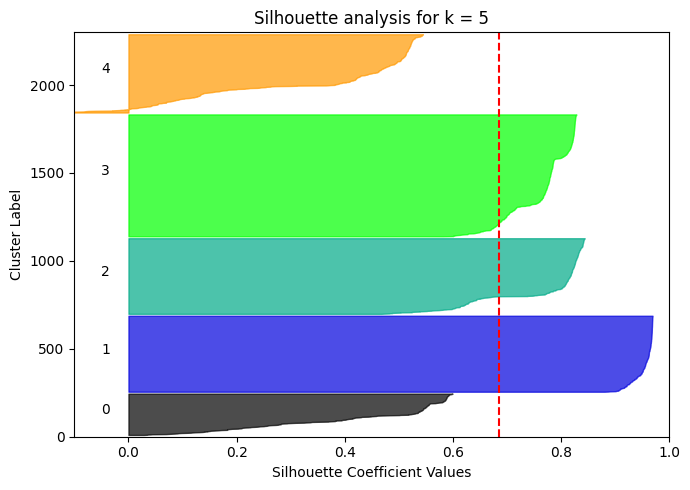

In [ ]:
# Find the best k for k-means using Silhouette method
k_values = range(2, 6)  # Define the range for k

# Loop through k values for silhouette analysis
for k in k_values:
    # Apply k-means clustering
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(pca_data)

    # Calculate silhouette scores
    silhouette_avg = silhouette_score(pca_data, cluster_labels)
    sample_silhouette_values = silhouette_samples(pca_data, cluster_labels)

    # Silhouette Plot
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(7, 5)

    # Set the limits for the plot
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(pca_data) + (k + 1) * 10])

    y_lower = 10
    for i in range(k):
        # Aggregate silhouette scores for cluster i
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = plt.cm.nipy_spectral(float(i) / k)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10

    # Add average silhouette score line
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    # Labels and title
    ax1.set_title(f"Silhouette analysis for k = {k}")
    ax1.set_xlabel("Silhouette Coefficient Values")
    ax1.set_ylabel("Cluster Label")
    plt.tight_layout()
    plt.show()

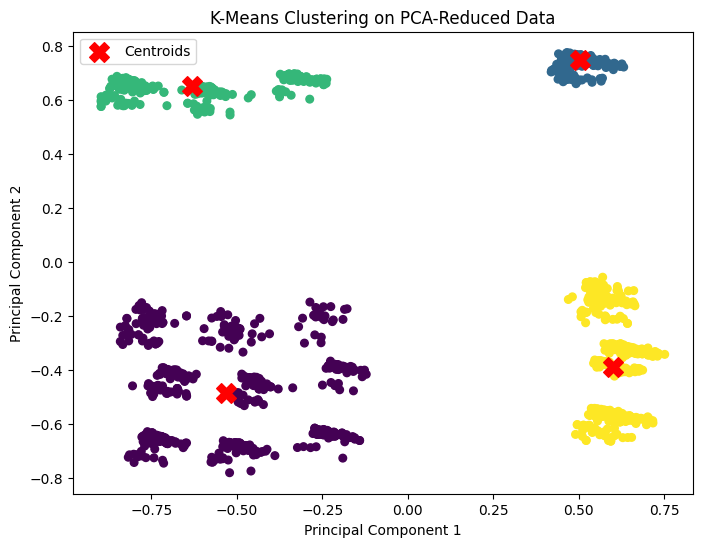

In [ ]:
# Apply K-Means
k = 4  # best clusters
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(pca_data)
y_kmeans = kmeans.predict(pca_data)

# Plot the Clusters
plt.figure(figsize=(8, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=y_kmeans, cmap='viridis', s=30)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=200, c='red', marker='X', label='Centroids')
plt.title("K-Means Clustering on PCA-Reduced Data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()

**Q**: In our human eye, it's looks like we need 5 clusters. But both methods return 2. Why do you think kmeans returning 2 and not 5?

**A**:In our case the K-Means returns 4 clusters.
K-Means might return 4 clusters instead of 5 due to its assumption of spherical clusters, loss of information in PCA and dominance of larger clusters.

## 5. K-means Clustering Exercise (10 points)
Manually divide a given set of points into clusters using the K-means clustering.

You are given the following two-dimensional points: <br>
*   A:(2,2)
*   B:(2,6)
*   C:(3,7)
*   D:(5,5)
*   E:(6,2)
*   F:(7,4)
*   G:(8,7)

**Tasks:**
1.   **Visualize the Data**: Plot these points and label each point for easy identification (3 points).
2.   **Choose Initial Cluster Centers**: Arbitrarily select three points as initial cluster centers (For example, you might choose points A and D) and **Answer the questions** (7 points).











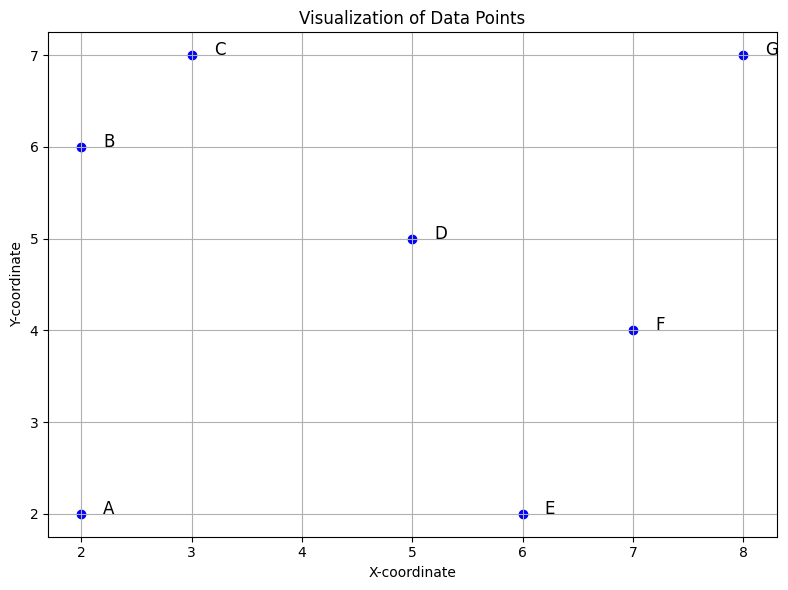

In [ ]:
# Define the points
points = {'A': (2, 2), 'B': (2, 6), 'C': (3, 7),
          'D': (5, 5), 'E': (6, 2), 'F': (7, 4), 'G': (8, 7)}

# Extract coordinates
x = [coord[0] for coord in points.values()]
y = [coord[1] for coord in points.values()]
labels = list(points.keys())

# Plot the points
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='blue')

# Add labels for each point
for label, (x_point, y_point) in points.items():
    plt.text(x_point + 0.2, y_point, label, fontsize=12)

plt.title("Visualization of Data Points")
plt.xlabel("X-coordinate")
plt.ylabel("Y-coordinate")
plt.grid(True)
plt.tight_layout()
plt.show()

**Questions**:
1.   How did the points group together in the final iteration?
2.   Was choosing different initial cluster centers leading to different final clusters? Why might this happen?
3.   Think of any real-world scenarios where K-means clustering could be useful?






**Answers**:
1. We will arbitrarily choose three points as initial cluster centers:

- Cluster 1: A (2,2)
- Cluster 2: D (5,5)
- Cluster 3: G (8,7)

 we will calculate the distance between each point and the cluster centers using the Euclidean distance formula:
 $$
d = \sqrt{(x_2 - x_1)^2 + (y_2 - y_1)^2}
$$









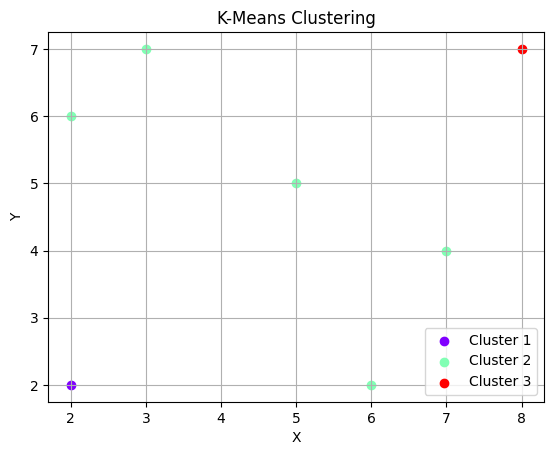

In [ ]:
# Function to calculate Euclidean distance
def euclidean_distance(point1, point2):
    return np.sqrt((point1[0] - point2[0])**2 + (point1[1] - point2[1])**2)

# Function to calculate k-means
def k_means(points, k, initial_centroids, max_iterations=100):
    # Convert points to numpy array
    points = np.array(points)

    # Use the provided initial centroids
    centroids = np.array(initial_centroids)

    for _ in range(max_iterations):
        # Assign points to the nearest centroid
        distances = np.array([[euclidean_distance(point, centroid) for centroid in centroids] for point in points])
        labels = np.argmin(distances, axis=1)

        # Update centroids
        new_centroids = np.array([points[labels == i].mean(axis=0) for i in range(k)])

        # If centroids do not change, stop early
        if np.allclose(centroids, new_centroids):
            break
        centroids = new_centroids

    return centroids, labels

# Visualization function
def visualize_k_means(points, centroids, labels, k):
    colors = plt.cm.rainbow(np.linspace(0, 1, k))
    points = np.array(points)

    for i, color in enumerate(colors):
        cluster_points = points[labels == i]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], color=color, label=f'Cluster {i+1}')

    plt.legend()
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('K-Means Clustering')
    plt.grid()
    plt.show()

# Given points
points = [(2, 2), (2, 6), (3, 7), (5, 5), (6, 2), (7, 4), (8, 7)]

# Number of clusters
k = 3

# Initial centroids chosen by the user
initial_centroids = [(2, 2), (5,5), (8, 7)]

# Run k-means and visualize
centroids, labels = k_means(points, k, initial_centroids)
visualize_k_means(points, centroids, labels, k)


2. **Yes, choosing different initial cluster centers can lead to different final clusters bacause:**
-  K-means relies on the initial placement of cluster centers. Different starting points can lead to different paths.
-  K-means minimizes the sum of squared distances within clusters. If the initial centers are poorly placed, the algorithm may converge to a suboptimal solution (local minimum).

Below is an example for different initial cluster centers that lead to different final clusters.

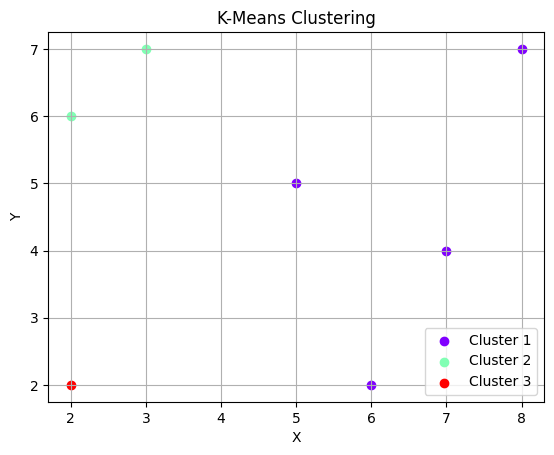

In [ ]:
# Number of clusters
k = 3

# Different initial centroids
initial_centroids = [(7, 4),(3, 7), (2, 2)]

# Run k-means and visualize
centroids, labels = k_means(points, k, initial_centroids)
visualize_k_means(points, centroids, labels, k)

3. **Real-World Scenarios Where K-means Clustering is Useful:**
- **Anomaly Detection:** Identifying outliers in financial transactions, network traffic, or manufacturing processes by finding points far from cluster centers.
- **Customer Segmentation:** Grouping customers based on purchasing behavior, demographics, or spending habits to create targeted marketing strategies.
- **Document Clustering:** Grouping documents or articles based on similarity in topics or keywords.

## 6. Principal Component Analysis (PCA) (10 points)
You are given a dataset with 5 rows and 5 columns as shown below. Perform Principal Component Analysis (PCA) on this dataset.

$\begin{pmatrix}
2 & 0 & 1 & 3 & 4\\
1 & 1 & 0 & 2 & 1\\
3 & 2 & 1 & 0 & 5\\
4 & 3 & 2 & 1 & 2\\
5 & 1 & 3 & 4 & 0\\
\end{pmatrix}$

**Tasks:**
1.   **Code**: Compute the eigenvectors using the PCA package from sklearn. (3 points).
2.   **On paper**: Project the dataset onto (1) A 1-dimensional space (first principal component). (2) A 2-dimensional space (first and second principal components). (7 points).

In [ ]:
# Define the dataset
data = np.array([[2, 0, 1, 3, 4],
                 [1, 1, 0, 2, 1],
                 [3, 2, 1, 0, 5],
                 [4, 3, 2, 1, 2],
                 [5, 1, 3, 4, 0]])

# Convert to DataFrame (optional)
df = pd.DataFrame(data, columns=['Col1', 'Col2', 'Col3', 'Col4', 'Col5'])

# Apply PCA
pca = PCA(n_components=2)  # Compute the first 2 principal components
pca_result = pca.fit_transform(df)

# Print the eigenvectors
print("Principal Components (Eigenvectors):\n" , np.array2string(pca.components_, precision=3, separator=', '))

Principal Components (Eigenvectors):
 [[-0.368,  0.05 , -0.32 , -0.48 ,  0.727],
 [ 0.641,  0.507,  0.364, -0.407,  0.181]]


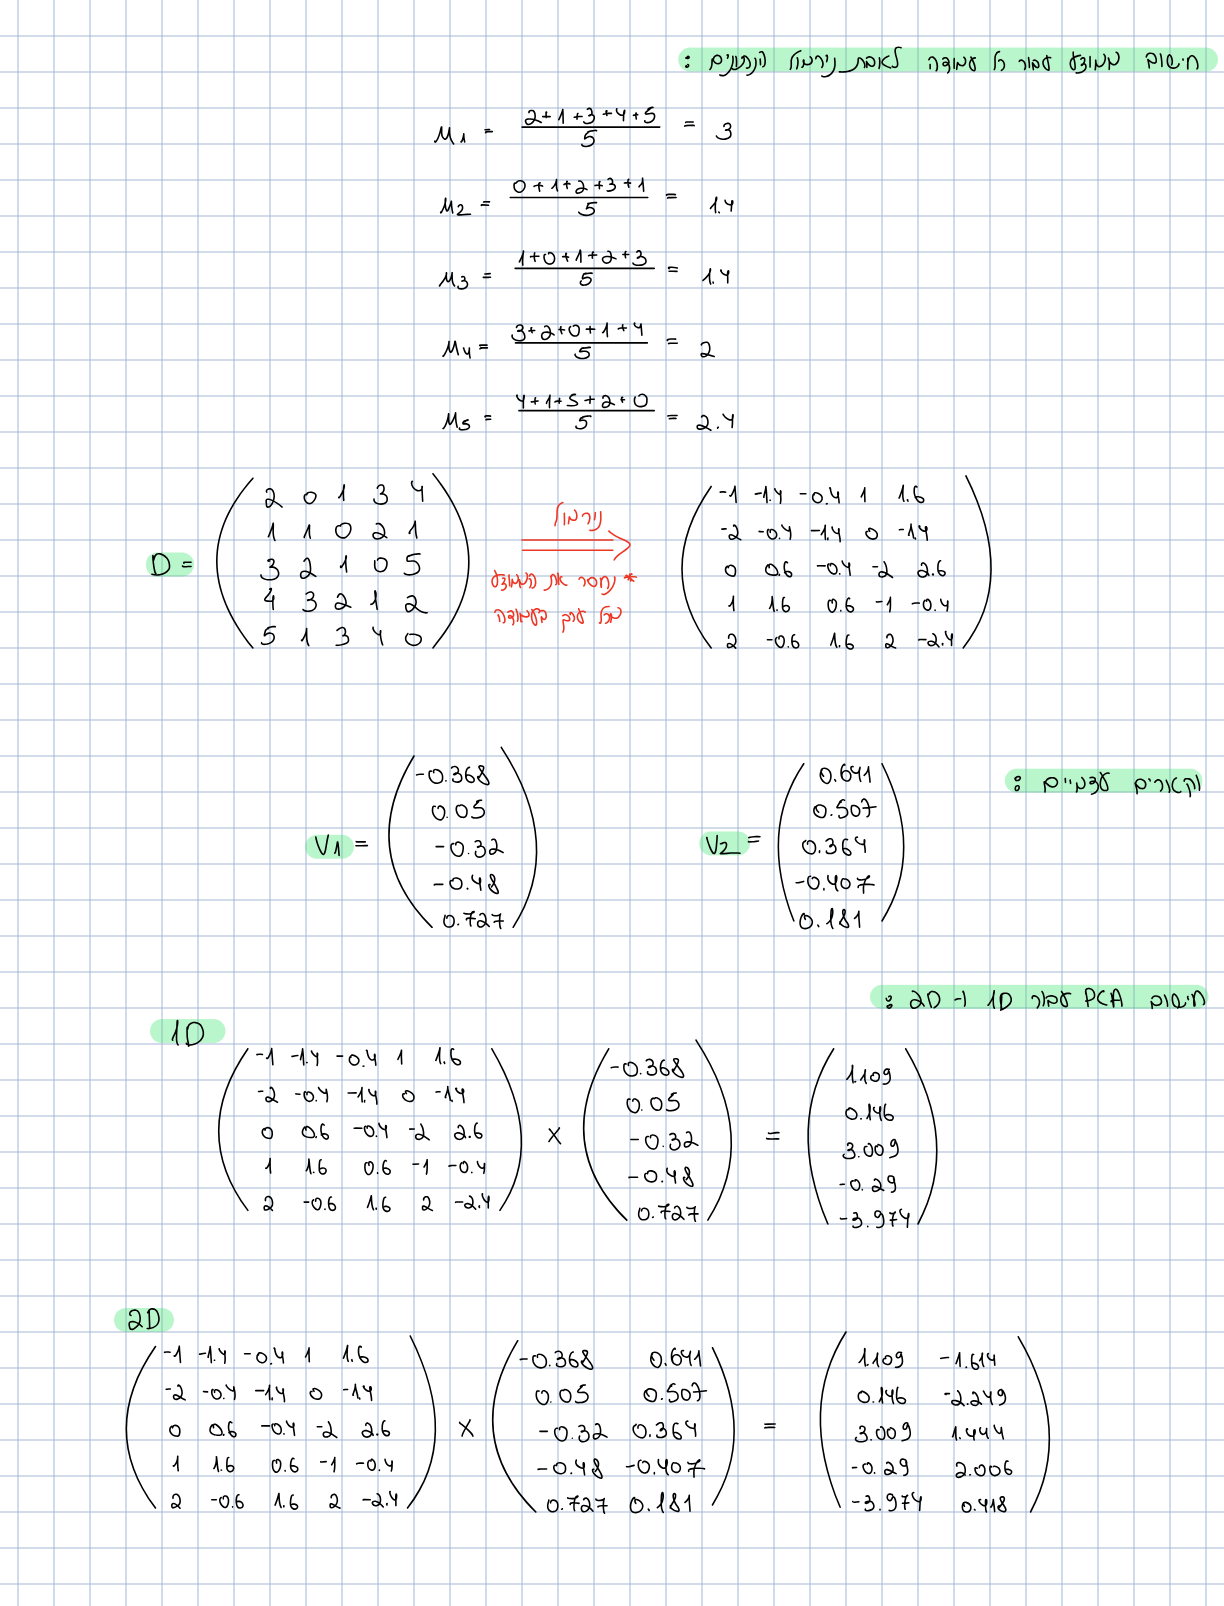